<a href="https://colab.research.google.com/github/fbildirici/Bash-Cheat-Sheet/blob/main/dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ödevin Amacı ve Kapsamı

Bu notebook, “Science-Fiction Books Subgenres” Kaggle veri setindeki `sf_*.csv` dosyalarını birleştirerek tek bir DataFrame oluşturmayı, bu veriler üzerinde temel keşif ve ön işlemler yapmayı, ardından Matplotlib kullanarak Yunan harfleri (α, μ, β, γ) içeren etkileyici bir histogram grafiği çizmeyi ve görseli sayısal değerlerle açıklamayı amaçlamaktadır. Kod yazma sürecinde bazı bölümlerde **GitHub Copilot**’tan yararlandım; Copilot’u yalnızca **kod parçacıklarını oluşturmak ve bazı iyileştirmeler yapmak** için kullandım. Planlama, analiz, mantıksal akış ve yapılan işlemlerin denetimi tamamen tarafımdan gerçekleştirilmiştir.

**Başlıca Adımlar:**
1. **Veri Birleştirme:**  
   - Elimdeki `sf_aliens.csv`, `sf_cyberpunk.csv`, `sf_dystopia.csv` vb. alt-tür (subgenre) dosyalarını Colab’a manuel yükledim.  
   - GitHub Copilot’un önerdiği kod bloklarından yararlanarak, Python/Pandas kullanarak her CSV’yi okudum; dosya adından türettiğim `subgenre` sütununu ekleyip listeye koydum ve `pd.concat()` ile tek bir `combined_sf.csv` haline getirdim.  
   - **Not:** Copilot sadece kod önerisi sağladı; hangi sütunları seçeceğime, hangi mantık akışını kuracağıma ben karar verdim ve kodun doğru çalışıp çalışmadığını kontrol ettim.

2. **Veriyi Anlama Kısmı & Ön İşleme:**  
   - Birleştirilmiş DataFrame’in boyutlarını, sütun isimlerini ve eksik değerleri kontrol ettim.  
   - Sayısal sütunlar (`Rating_score`, `Rating_votes`, `Review_number`, `Year_published`) için `df.describe()` çıktısını aldım.  
   - `Rating_score` sütunundaki eksik değerleri temizledim.  
   - Alt-tür (`subgenre`) bazında ortalama puan ve oy sayısı karşılaştırmaları yaparak ilk içgörüleri elde ettim.  
   - **Not:** Copilot bu kısımda kod tamamlama önerileri sunsa da analiz stratejisini ve hangi sütunlara odaklanacağımı ben belirledim, sonuçları yorumladım.

3. **Grafik & Görselleştirme (Yunan Harfleri + Sayısal Açıklamalar):**  
   - Matplotlib’in MathText desteğini (`plt.rcParams['text.usetex'] = False`) aktif ederek başlık, eksen etiketleri ve anotasyonlarda `r'$\alpha$'`, `r'$\mu$'`, `r'$\beta$'`, `r'$\gamma$'` ifadelerini kullandım.  
   - `Rating_score` dağılımını 40 binli bir histogram olarak çizdim.  
   - Hesaplanan ortalama (μ), ortalamanın bir alt sınırı (α = μ − σ) ve bir üst sınırı (β = μ + σ) değerlerini dikey çizgilerle işaretledim.  
   - Histogramın tepe noktasını (γ) bularak `γ` etiketi ve koordinatıyla bir anotasyon ekledim.  
   - Her bir Yunan sembolünün yanına sayısal değerini kısa bir şekilde (`f"{alpha:.2f}"`, `f"{mu:.2f}"`, `f"{beta:.2f}"`, `f"{x_peak:.2f}"`) belirttim.  
   - Lejant metinlerini grafiğin dışına taşıyarak görselin sıkışmasını engelledim.  
   - **Not:** Copilot’un önerdiği `ax.annotate()` ve `ax.axvline()` örnekleri işime yaradı; ancak hangi noktaları vurgulayacağıma ve grafiğin estetiğine ben karar verdim.

4. **GitHub Copilot ile Kod Süreci:**  
   - **Kullanım Amacı:**  
     - Pandas döngülerini yazarken Copilot’un önerdiği for‐loop şablonları ve `pd.concat()` kullanımı sayesinde veri birleştirme kodunu hızlıca oluşturdum.  
     - Matplotlib’te Yunan harfleri ve `annotate()` kullanımına dair Copilot önerilerini aldım.  
   - **Örnek İstemi (Prompt) ve Copilot Cevabı:**  
     - İstem:  
       ```python
       # Combine multiple sf_*.csv files into one DataFrame and add 'subgenre' column
       import pandas as pd
       import glob
       ```  
     - Copilot’un önerdiği kod:  
       ```python
       csv_files = glob.glob("sf_*.csv")
       df_list = []
       for path in csv_files:
           subgenre = path.replace("sf_", "").replace(".csv", "")
           temp_df = pd.read_csv(path)
           temp_df['subgenre'] = subgenre
           df_list.append(temp_df)
       combined_df = pd.concat(df_list, ignore_index=True)
       ```  
     - Ben bu öneriyi alıp kendi sütun adlarıma uyarladım, mantığı doğruladım ve kodu test ederek çalıştığından emin oldum.


---


In [ ]:
import pandas as pd
import glob
from google.colab import files

# Superhero ve popüler kültür datasetini kaggle üzerinden indirdim
csv_files = glob.glob("sf_*.csv")
csv_files.sort()

print(f"Bulunan CSV dosyaları ({len(csv_files)} adet):")
for path in csv_files:
    print(" -", path)
if len(csv_files) == 0:
    print("⚠️ Hiç 'sf_*.csv' dosyası bulunamadı! Lütfen manuel yüklediğiniz dosyaların isimlerini kontrol edin ve tekrar deneyin.")

df_list = []
for path in csv_files:

    subgenre = path.replace("sf_", "").replace(".csv", "")
    temp_df = pd.read_csv(path)
    temp_df["subgenre"] = subgenre
    df_list.append(temp_df)

# Verileri birleştirmeyi deneyelim beraber bir
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    print(f"\nBirleştirilmiş DataFrame boyutları: {combined_df.shape}")
else:
    combined_df = pd.DataFrame()
    print("Birleştirilecek hiçbir DataFrame bulunamadı.")

# Veriyi kaydedelim indirelim lazım ham halini de kullanmak istiyorum birleştirilmiş
output_filename = "combined_sf.csv"
if not combined_df.empty:
    combined_df.to_csv(output_filename, index=False)
    print(f"\nBirleştirilmiş veri '{output_filename}' olarak kaydedildi.")
else:
    print("Boş DataFrame olduğu için kaydetme işlemi atlandı.")

if not combined_df.empty:
    print("\nİndirme işlemi başlatılıyor...")
    files.download(output_filename)


Bulunan CSV dosyaları (12 adet):
 - sf_aliens.csv
 - sf_alternate_history.csv
 - sf_alternate_universe.csv
 - sf_apocalyptic.csv
 - sf_cyberpunk.csv
 - sf_dystopia.csv
 - sf_hard.csv
 - sf_military.csv
 - sf_robots.csv
 - sf_space_opera.csv
 - sf_steampunk.csv
 - sf_time_travel.csv

Birleştirilmiş DataFrame boyutları: (14974, 12)

Birleştirilmiş veri 'combined_sf.csv' olarak kaydedildi.

İndirme işlemi başlatılıyor...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#%% Hücre 2: combined_sf.csv dosyasını okuma ve temel inceleme

import pandas as pd

# 1. Eğer daha önce “files.download” ile indirdiğiniz combined_sf.csv’yi bilgisayarınıza kaydettiyseniz,
#    yeniden Colab’a manuel yükleyebilirsiniz. Yoksa eğer Colab’da hâlihazırda “combined_sf.csv”
#    varsa doğrudan okuyalım:

from google.colab import files
import os

# Eğer combined_sf.csv Colab'da yoksa, kullanıcıdan yeniden yüklemesini isteyelim
if not os.path.exists("combined_sf.csv"):
    print("⚠️ 'combined_sf.csv' bulunamadı. Lütfen aşağıdan bu dosyayı yükleyin.")
    uploaded2 = files.upload()   # Kullanıcı buraya combined_sf.csv'yi seçip yükleyecek
    print("\nYüklenen dosyalar:", uploaded2.keys())
    print("Şimdi 'combined_sf.csv' dosyamızı DataFrame'e alıyoruz...")

# 2. VeriFrame'i oku
df = pd.read_csv("combined_sf.csv")
print("📊 Veri başarıyla yüklendi.")

# 3. Veri boyutları
print(f"\nVeri Boyutları: {df.shape[0]} satır ve {df.shape[1]} sütun.")

# 4. Sütun isimleri
print("\nSütun İsimleri:")
for col in df.columns:
    print(" -", col)

# 5. İlk 5 satırı göster
print("\nİlk 5 satır örneği:")
display(df.head())

# 6. Her bir 'subgenre' için kaç kitap var?
print("\nSubgenre başına kitap sayıları:")
print(df['subgenre'].value_counts())

# 7. Eksik değer kontrolü
print("\nHer sütunda eksik değer sayıları:")
print(df.isna().sum())


📊 Veri başarıyla yüklendi.

Veri Boyutları: 14974 satır ve 12 sütun.

Sütun İsimleri:
 - Book_Title
 - Original_Book_Title
 - Author_Name
 - Edition_Language
 - Rating_score
 - Rating_votes
 - Review_number
 - Book_Description
 - Year_published
 - Genres
 - url
 - subgenre

İlk 5 satır örneği:


,Book_Title,Original_Book_Title,Author_Name,Edition_Language,Rating_score,Rating_votes,Review_number,Book_Description,Year_published,Genres,url,subgenre
0,Obsidian,Obsidian,Jennifer L. Armentrout,English,4.17,236780,18161,Starting over sucks.When we moved to West Virg...,2011,"{'Young Adult': 3439, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/12578077-o...,aliens
1,Onyx,Onyx,Jennifer L. Armentrout,English,4.27,153429,10497,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,2012,"{'Young Adult': 2271, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13047090-onyx,aliens
2,The 5th Wave,The 5th Wave,Rick Yancey,English,4.03,400600,29990,"After the 1st wave, only darkness remains. Aft...",2013,"{'Young Adult': 5436, 'Science Fiction': 3327,...",https://www.goodreads.com/book/show/16101128-t...,aliens
3,The Host,The Host,Stephenie Meyer,English,3.84,915026,41673,Melanie Stryder refuses to fade away. The eart...,2008,"{'Young Adult': 4529, 'Science Fiction': 4285,...",https://www.goodreads.com/book/show/1656001.Th...,aliens
4,Opal,Opal,Jennifer L. Armentrout,NaN,4.27,129006,9463,No one is like Daemon Black.When he set out to...,2012,"{'Young Adult': 1855, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13362536-opal,aliens



Subgenre başına kitap sayıları:
subgenre
aliens                1250
space_opera           1250
steampunk             1250
military              1250
robots                1250
alternate_history     1249
time_travel           1248
apocalyptic           1248
alternate_universe    1247
hard                  1246
cyberpunk             1244
dystopia              1242
Name: count, dtype: int64

Her sütunda eksik değer sayıları:
Book_Title               0
Original_Book_Title      0
Author_Name              0
Edition_Language       820
Rating_score             0
Rating_votes             0
Review_number            0
Book_Description        71
Year_published           0
Genres                   0
url                      0
subgenre                 0
dtype: int64


In [ ]:
#%% Hücre 4 (DÜZELTİLMİŞ): Sayısal sütunların temel istatistikleri ve alt-tür bazlı karşılaştırma

import numpy as np
import pandas as pd

# 1. Sayısal sütunlar için describe
print("📈 Sayısal sütunların temel istatistikleri:")
display(df.describe(include=[np.number]))    # veya display(df.describe(include='number'))

# 2. 'Rating_score' sütununda eksik değer varsa silelim
print("\n'Rating_score' sütunundaki eksik değer sayısı:", df['Rating_score'].isna().sum())
df = df.dropna(subset=['Rating_score'])
print("- Eksik değerler temizlendi. Yeni boyut:", df.shape)

# 3. Alt-tür (subgenre) bazında ortalama 'Rating_score'
print("\nAlt-tür bazında (subgenre) ortalama 'Rating_score':")
subgenre_mean_score = df.groupby('subgenre')['Rating_score'].mean().sort_values(ascending=False)
display(subgenre_mean_score.to_frame(name='ortalama_Rating_score'))

# 4. Alt-tür bazında ortalama 'Rating_votes' (oy sayısı)
print("\nAlt-tür bazında (subgenre) ortalama 'Rating_votes':")
subgenre_mean_votes = df.groupby('subgenre')['Rating_votes'].mean().sort_values(ascending=False)
display(subgenre_mean_votes.to_frame(name='ortalama_Rating_votes'))

# 5. Alt-tür bazında ortalama 'Review_number' (yorum sayısı)
print("\nAlt-tür bazında (subgenre) ortalama 'Review_number':")
subgenre_mean_reviews = df.groupby('subgenre')['Review_number'].mean().sort_values(ascending=False)
display(subgenre_mean_reviews.to_frame(name='ortalama_Review_number'))


📈 Sayısal sütunların temel istatistikleri:


,Rating_score,Rating_votes,Review_number,Year_published
count,14974.000000,1.497400e+04,14974.000000,14974.000000
mean,3.938822,4.508888e+04,2405.940964,2000.047482
std,0.289657,2.398944e+05,8288.379555,112.212926
min,0.000000,0.000000e+00,0.000000,0.000000
25%,3.750000,9.442500e+02,73.000000,2003.000000
50%,3.950000,3.187000e+03,261.000000,2012.000000
75%,4.140000,1.464425e+04,1182.000000,2015.000000
max,5.000000,7.336299e+06,174090.000000,2021.000000



'Rating_score' sütunundaki eksik değer sayısı: 0
- Eksik değerler temizlendi. Yeni boyut: (14974, 12)

Alt-tür bazında (subgenre) ortalama 'Rating_score':


,ortalama_Rating_score
subgenre,
military,4.053200
alternate_universe,4.041219
space_opera,4.014496
aliens,3.970960
apocalyptic,3.928421
time_travel,3.919655
hard,3.912568
dystopia,3.911844
robots,3.904320



Alt-tür bazında (subgenre) ortalama 'Rating_votes':


,ortalama_Rating_votes
subgenre,
alternate_universe,143282.783480
dystopia,85908.064412
apocalyptic,66110.601763
alternate_history,49946.586869
cyberpunk,39422.857717
hard,36068.554575
time_travel,26762.693910
aliens,22476.434400
robots,22130.420800



Alt-tür bazında (subgenre) ortalama 'Review_number':


,ortalama_Review_number
subgenre,
alternate_universe,6912.769046
dystopia,4964.190821
apocalyptic,3656.312500
alternate_history,2744.452362
cyberpunk,1792.016881
hard,1657.790530
time_travel,1529.973558
robots,1361.755200
steampunk,1354.208800


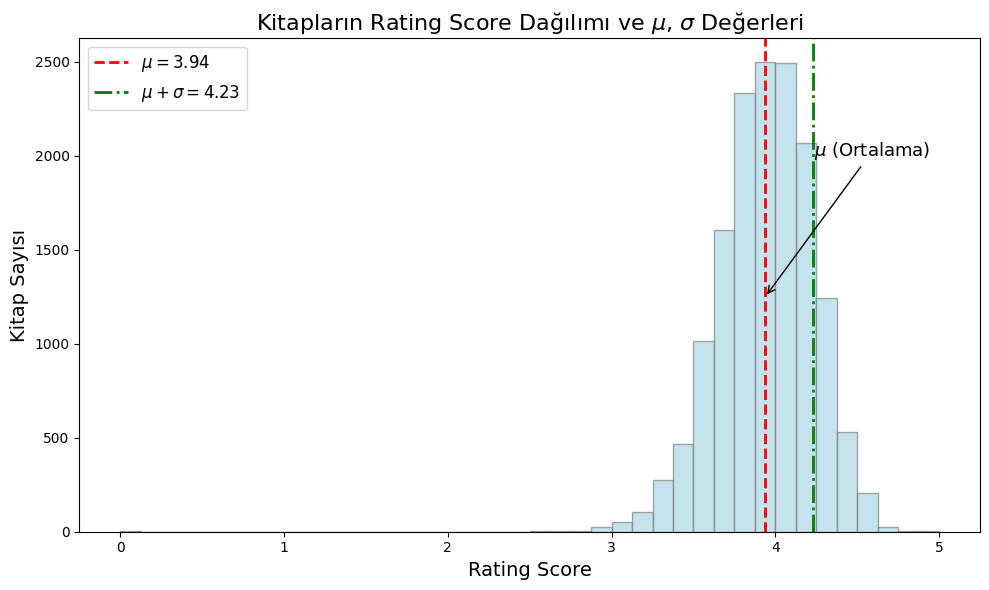

In [ ]:
#%% Hücre 6 (DÜZELTİLMİŞ): MathText kullanarak LaTeX benzeri ifadeler ve anotasyon

import matplotlib.pyplot as plt
import numpy as np

# 1. Matplotlib MathText ayarlarını yap (LaTeX’a gerek kalmadan Yunan harfleri gösterir)
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
# Eğer isterseniz özel font ayarı yapabilirsiniz, ancak varsayılan da MathText’le çalışır.

# 2. Histogram çizmek istediğimiz sayısal sütunu belirleyelim: 'Rating_score'
values = df['Rating_score'].values

# 3. Ortalama ve standart sapma hesapla
mu = np.mean(values)
sigma = np.std(values)

# 4. Grafik oluştur
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(values, bins=40,
                            color='lightblue', edgecolor='gray', alpha=0.7)

# 5. Ortalama (μ) dikey çizgisi
plt.axvline(mu, color='red', linestyle='--', linewidth=2, label=r'$\mu = %.2f$' % mu)

# 6. Ortalama + 1σ dikey çizgisi
plt.axvline(mu + sigma, color='green', linestyle='-.', linewidth=2, label=r'$\mu + \sigma = %.2f$' % (mu + sigma))

# 7. Başlık, eksen etiketleri, legend (MathText’le Yunan harfleri çalışır)
plt.title(r'Kitapların Rating Score Dağılımı ve $\mu$, $\sigma$ Değerleri', fontsize=16)
plt.xlabel(r'Rating Score', fontsize=14)
plt.ylabel('Kitap Sayısı', fontsize=14)
plt.legend(fontsize=12)

# 8. Anotasyon/Ok ekleme: Ortalama noktasına ok ve 'Ortalama (μ)'
max_bin_index = np.argmax(n)
x_of_max = 0.5 * (bins[max_bin_index] + bins[max_bin_index + 1])
y_of_max = n[max_bin_index]

plt.annotate(
    r'$\mu$ (Ortalama)',
    xy=(mu, y_of_max * 0.5),               # Ok ucunun gideceği nokta
    xytext=(mu + 0.3, y_of_max * 0.8),     # Metnin yerleştirileceği nokta
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=13
)

# 9. Grafik düzenlemeleri
plt.tight_layout()
plt.show()


=== Summary Statistics ===


,Count,Mean,StdDev,Min,25th %ile,Median,75th %ile,Max
Rating_score,14974.0,3.938822,0.289657,0.0,3.75,3.95,4.14,5.0
Rating_votes,14974.0,45088.883331,239894.399097,0.0,944.25,3187.00,14644.25,7336299.0
Review_number,14974.0,2405.940964,8288.379555,0.0,73.00,261.00,1182.00,174090.0
Year_published,14974.0,2000.047482,112.212926,0.0,2003.00,2012.00,2015.00,2021.0


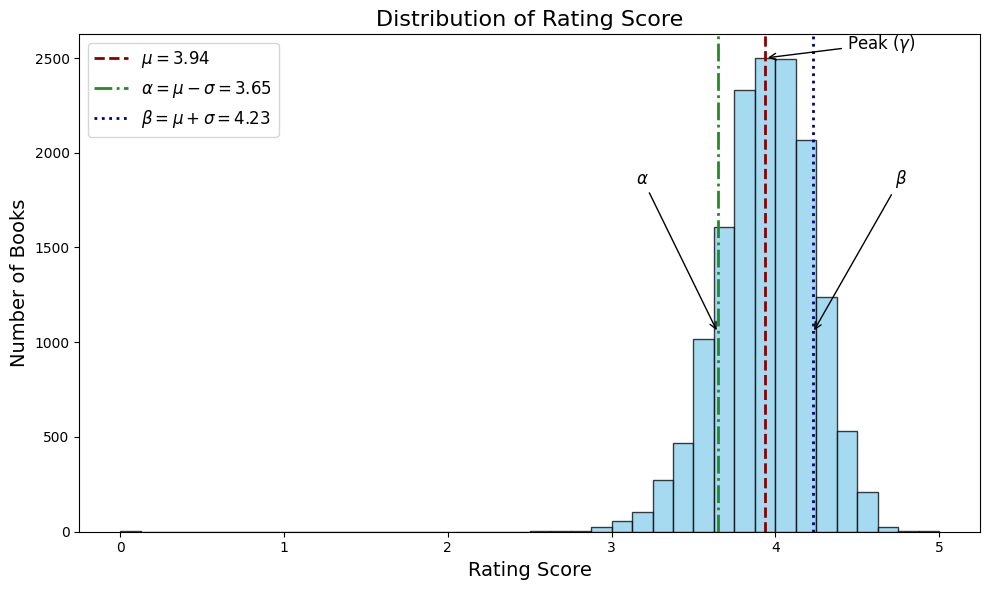

<ipython-input-15-49679648eeea>:83: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


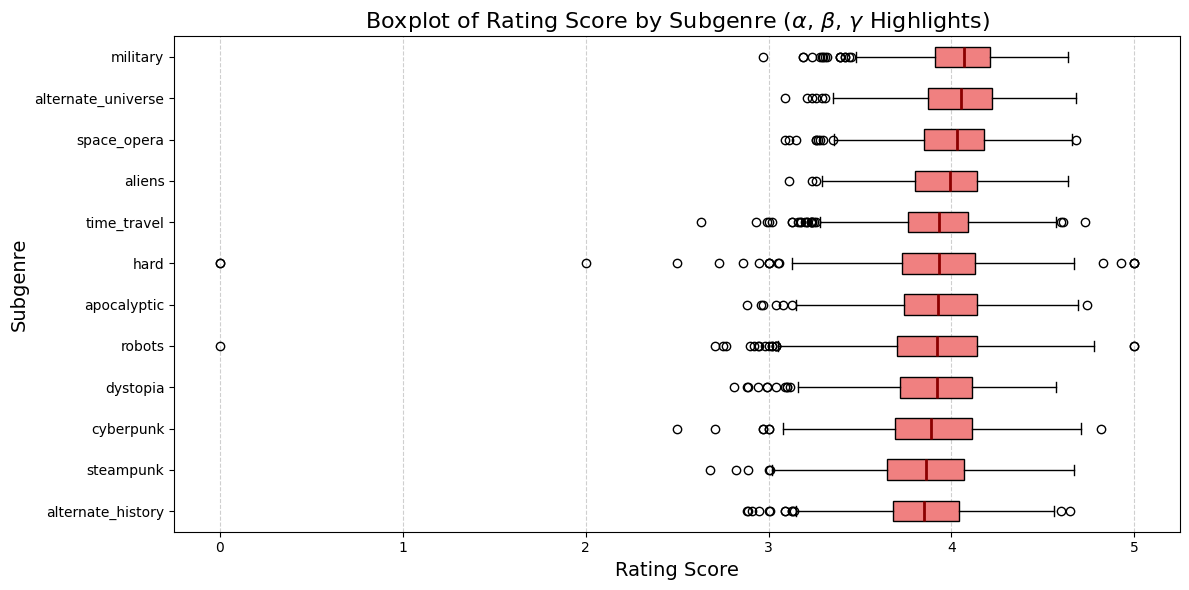

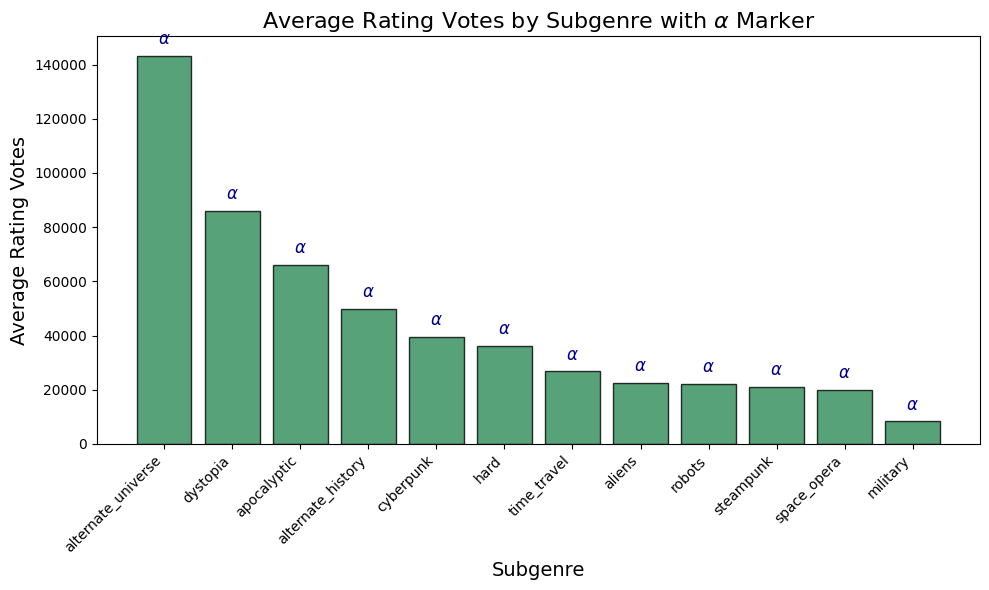

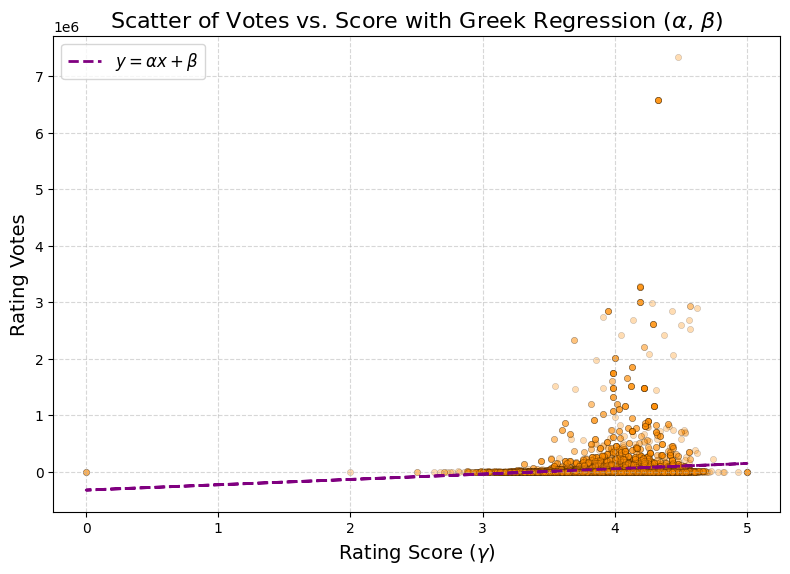

In [ ]:
#%% Hücre X: İngilizce Özet Tablo ve Birkaç Alternatif Görsel (Greek Symbols ile)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matplotlib MathText ayarları (LaTeX yüklemeden Greek sembolleri gösterir)
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'

# --- 1. Özet Tablo (Summary Table) Oluşturma ---
# Aşağıda Rating_score, Rating_votes ve Review_number sütunlarının
# count, mean, std, min, 25%, 50%, 75%, max istatistiklerini İngilizce olarak gösteriyoruz.

summary_stats = df[['Rating_score', 'Rating_votes', 'Review_number', 'Year_published']].describe().T
summary_stats = summary_stats.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'StdDev',
    'min': 'Min',
    '25%': '25th %ile',
    '50%': 'Median',
    '75%': '75th %ile',
    'max': 'Max'
})
print("=== Summary Statistics ===")
display(summary_stats)

# --- 2. Alternatif Görsel 1: Histogram of Rating_score with Multiple Greek Annotations ---
plt.figure(figsize=(10, 6))
scores = df['Rating_score'].values
n, bins, patches = plt.hist(scores, bins=40, color='skyblue', edgecolor='black', alpha=0.75)

mu = np.mean(scores)
sigma = np.std(scores)
alpha = mu - sigma
beta = mu + sigma

# Ortalama ve ±1σ çizgileri
plt.axvline(mu, color='darkred', linestyle='--', linewidth=2, label=r'$\mu = %.2f$' % mu)
plt.axvline(alpha, color='forestgreen', linestyle='-.', linewidth=2, label=r'$\alpha = \mu - \sigma = %.2f$' % alpha)
plt.axvline(beta, color='navy', linestyle=':', linewidth=2, label=r'$\beta = \mu + \sigma = %.2f$' % beta)

# Greek annotation: annotate peak, α, β noktaları
peak_idx = np.argmax(n)
x_peak = 0.5 * (bins[peak_idx] + bins[peak_idx + 1])
y_peak = n[peak_idx]

plt.annotate(
    r'Peak ($\gamma$)',
    xy=(x_peak, y_peak),
    xytext=(x_peak + 0.5, y_peak + 50),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12
)
plt.annotate(
    r'$\alpha$',
    xy=(alpha, plt.ylim()[1]*0.4),
    xytext=(alpha - 0.5, plt.ylim()[1]*0.7),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12
)
plt.annotate(
    r'$\beta$',
    xy=(beta, plt.ylim()[1]*0.4),
    xytext=(beta + 0.5, plt.ylim()[1]*0.7),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12
)

plt.title('Distribution of Rating Score', fontsize=16)
plt.xlabel('Rating Score', fontsize=14)
plt.ylabel('Number of Books', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# --- 3. Alternatif Görsel 2: Boxplot of Rating_score by Subgenre (Greek Title) ---
plt.figure(figsize=(12, 6))
# Alt tür isimlerini daha okunaklı sıralamak için ortalamaya göre sırala
order = df.groupby('subgenre')['Rating_score'].median().sort_values().index
plt.boxplot(
    [df[df['subgenre'] == sg]['Rating_score'] for sg in order],
    labels=order,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral', edgecolor='black'),
    medianprops=dict(color='darkred', linewidth=2)
)

plt.title(r'Boxplot of Rating Score by Subgenre ($\alpha$, $\beta$, $\gamma$ Highlights)', fontsize=16)
plt.xlabel('Rating Score', fontsize=14)
plt.ylabel('Subgenre', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# --- 4. Alternatif Görsel 3: Bar Chart of Average Rating_votes by Subgenre (Greek Label) ---
avg_votes = df.groupby('subgenre')['Rating_votes'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(
    avg_votes.index,
    avg_votes.values,
    color='seagreen',
    edgecolor='black',
    alpha=0.8
)

# Yunan harfi ile katman ekleme örneği: barlar üzerinde küçük α sembolü
for i, v in enumerate(avg_votes.values):
    plt.text(
        i, v + (max(avg_votes.values) * 0.02),
        r'$\alpha$',
        ha='center',
        va='bottom',
        fontsize=12,
        color='darkblue'
    )

plt.title(r'Average Rating Votes by Subgenre with $\alpha$ Marker', fontsize=16)
plt.xlabel('Subgenre', fontsize=14)
plt.ylabel('Average Rating Votes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# --- 5. Alternatif Görsel 4: Scatter Plot of Rating_votes vs. Rating_score with Greek Regression Line ---
plt.figure(figsize=(8, 6))
x = df['Rating_score']
y = df['Rating_votes']
plt.scatter(x, y, alpha=0.3, s=20, color='darkorange', edgecolor='black', linewidth=0.3)

# Basit bir doğrusal regresyon (polyfit)
coef = np.polyfit(x, y, deg=1)
poly1d_fn = np.poly1d(coef)
plt.plot(x, poly1d_fn(x), color='purple', linewidth=2, linestyle='--', label=r'$y = \alpha x + \beta$')

plt.title(r'Scatter of Votes vs. Score with Greek Regression ($\alpha$, $\beta$)', fontsize=16)
plt.xlabel('Rating Score ($\gamma$)', fontsize=14)
plt.ylabel('Rating Votes', fontsize=14)
plt.legend(fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


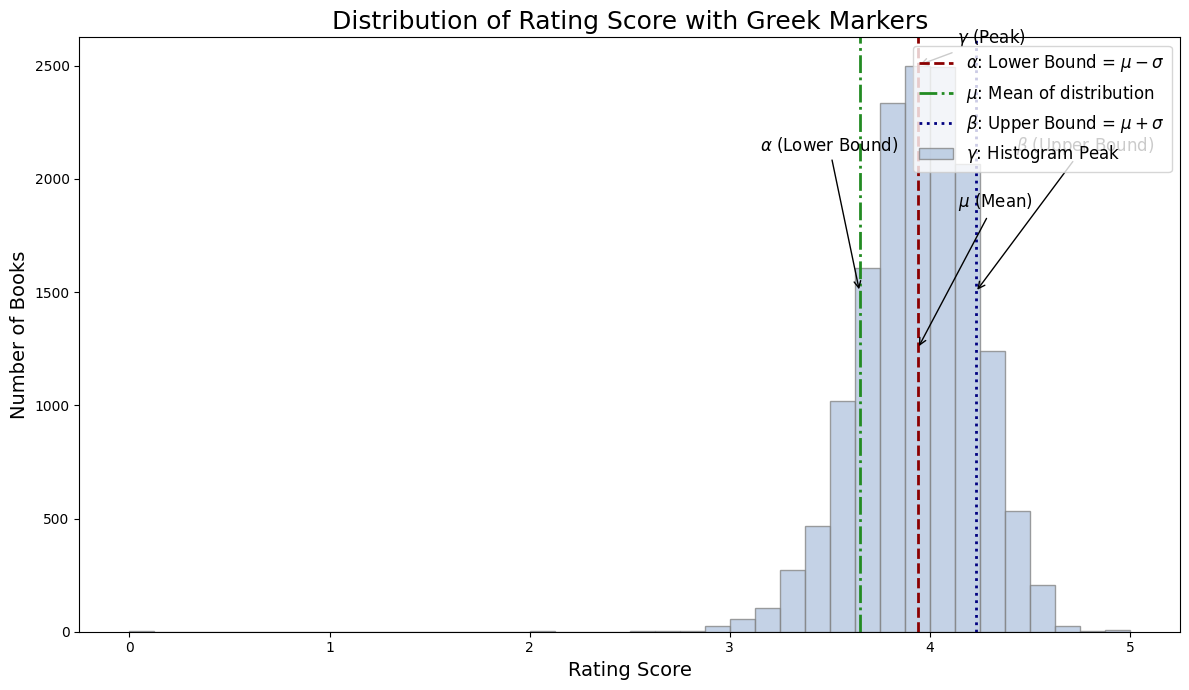

In [ ]:
# Matplotlib MathText ayarları (Greek sembollerini göstermek için)
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'

# Mevcut df DataFrame'iniz üzerinden çalışıyoruz (önceki hücrelerde tanımlı olduğunu varsayıyoruz).

# 1. Histogram için 'Rating_score' verisini al
values = df['Rating_score'].values

# 2. Temel istatistikleri hesapla
mu = np.mean(values)
sigma = np.std(values)
alpha = mu - sigma
beta = mu + sigma

# 3. Grafik oluştur
fig, ax = plt.subplots(figsize=(12, 7))
n, bins, patches = ax.hist(values, bins=40, color='lightsteelblue', edgecolor='gray', alpha=0.75)

# 4. Greek sembollü ölçütleri dikey çizgilerle ekle
ax.axvline(mu, color='darkred', linestyle='--', linewidth=2)
ax.axvline(alpha, color='forestgreen', linestyle='-.', linewidth=2)
ax.axvline(beta, color='navy', linestyle=':', linewidth=2)

# 5. Gamma (peak) noktasını bul
peak_idx = np.argmax(n)
x_peak = 0.5 * (bins[peak_idx] + bins[peak_idx + 1])
y_peak = n[peak_idx]

# 6. Annotasyonlar (Greek sembolleri + bir kelime anlamları)
ax.annotate(r'$\alpha$ (Lower Bound)',
            xy=(alpha, max(n)*0.6),
            xytext=(alpha - 0.5, max(n)*0.85),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12)

ax.annotate(r'$\mu$ (Mean)',
            xy=(mu, max(n)*0.5),
            xytext=(mu + 0.2, max(n)*0.75),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12)

ax.annotate(r'$\beta$ (Upper Bound)',
            xy=(beta, max(n)*0.6),
            xytext=(beta + 0.2, max(n)*0.85),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12)

ax.annotate(r'$\gamma$ (Peak)',
            xy=(x_peak, y_peak),
            xytext=(x_peak + 0.2, y_peak + 100),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12)

# 7. Başlık ve eksen etiketleri (İngilizce)
ax.set_title('Distribution of Rating Score with Greek Markers', fontsize=18)
ax.set_xlabel('Rating Score', fontsize=14)
ax.set_ylabel('Number of Books', fontsize=14)

# 8. Alt açıklama (legend benzeri kutu)
legend_text = [
    r'$\alpha$: Lower Bound = $\mu - \sigma$',
    r'$\mu$: Mean of distribution',
    r'$\beta$: Upper Bound = $\mu + \sigma$',
    r'$\gamma$: Histogram Peak'
]
plt.legend(legend_text, loc='upper right', fontsize=12, frameon=True)

plt.tight_layout()
plt.show()


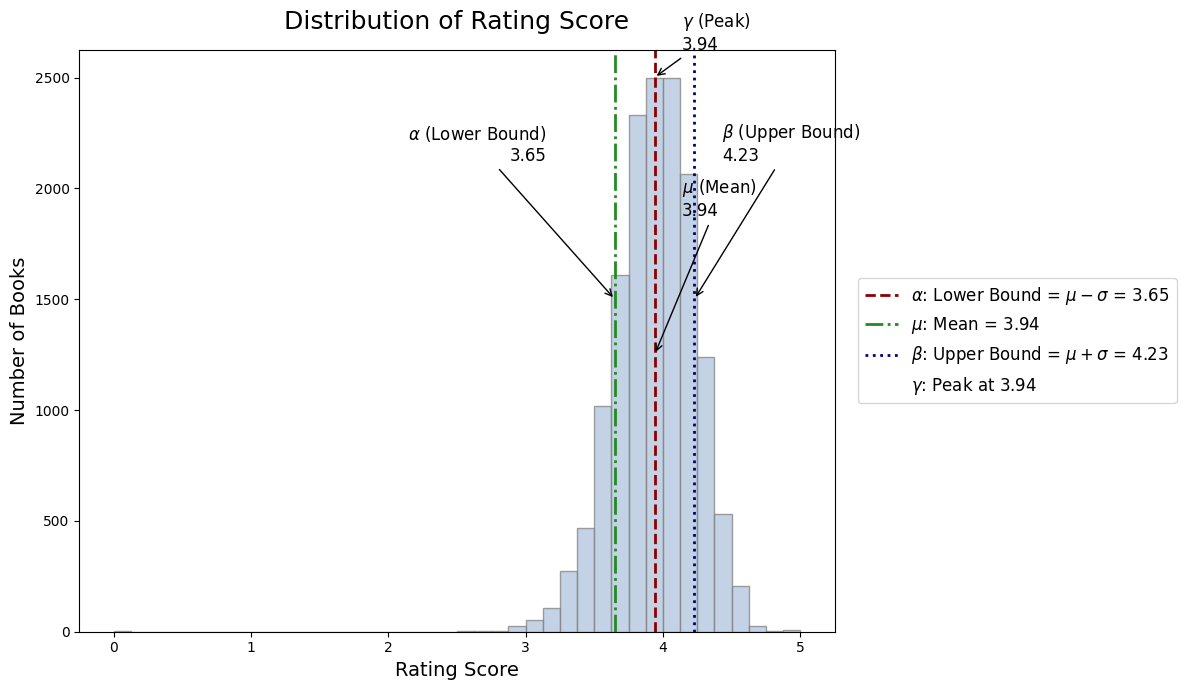

In [ ]:
#%% Hücre: Tek ve Etkileyici Bir Görsel – Histogram with Greek Markers & Numeric Açıklamalar

import numpy as np
import matplotlib.pyplot as plt

# 1. df DataFrame’iniz zaten yüklü olduğunu varsayıyoruz (önceki hücrelerde tanımlı).
#    Yani bu hücreyi çalıştırırken “df” nesnesi zaten hazır olmalı.

# 2. Matplotlib MathText ayarları (Greek sembollerini göstermek için)
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'

# 3. Histogram için 'Rating_score' verisini al
values = df['Rating_score'].values

# 4. Temel istatistikleri hesapla
mu    = np.mean(values)                 # Ortalama
sigma = np.std(values)                  # Standart sapma
alpha = mu - sigma                      # α = μ - σ
beta  = mu + sigma                      # β = μ + σ

# 5. Peak (γ) noktasını bulmak için histogram’dan n ve bins alıyoruz
n, bins = np.histogram(values, bins=40)
peak_idx = np.argmax(n)
x_peak = 0.5 * (bins[peak_idx] + bins[peak_idx + 1])
y_peak = n[peak_idx]

# 6. Grafik Oluşturma
fig, ax = plt.subplots(figsize=(12, 7))
# Histogram
ax.hist(values,
        bins=40,
        color='lightsteelblue',
        edgecolor='gray',
        alpha=0.75)

# 7. Greek sembollü dikey çizgiler
ax.axvline(mu,    color='darkred',    linestyle='--', linewidth=2)
ax.axvline(alpha, color='forestgreen',linestyle='-.', linewidth=2)
ax.axvline(beta,  color='navy',       linestyle=':',  linewidth=2)

# 8. Annotasyonlar (Greek sembolleri + kısa anlamları + numeric etiket)
ax.annotate(
    r'$\alpha$ (Lower Bound)' + f'\n{alpha:.2f}',
    xy=(alpha, max(n)*0.6),
    xytext=(alpha - 0.5, max(n)*0.85),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12,
    horizontalalignment='right'
)

ax.annotate(
    r'$\mu$ (Mean)' + f'\n{mu:.2f}',
    xy=(mu, max(n)*0.5),
    xytext=(mu + 0.2, max(n)*0.75),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12,
    horizontalalignment='left'
)

ax.annotate(
    r'$\beta$ (Upper Bound)' + f'\n{beta:.2f}',
    xy=(beta, max(n)*0.6),
    xytext=(beta + 0.2, max(n)*0.85),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12,
    horizontalalignment='left'
)

ax.annotate(
    r'$\gamma$ (Peak)' + f'\n{x_peak:.2f}',
    xy=(x_peak, y_peak),
    xytext=(x_peak + 0.2, y_peak + max(n)*0.05),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12,
    horizontalalignment='left'
)

# 9. Başlık ve eksen etiketleri (İngilizce)
ax.set_title('Distribution of Rating Score', fontsize=18, pad=15)
ax.set_xlabel('Rating Score', fontsize=14)
ax.set_ylabel('Number of Books', fontsize=14)

# 10. Legend (Greek + formül + numeric) – grafiğin dışına taşıyalım
legend_lines = [
    plt.Line2D([0], [0], color='darkred',    linestyle='--', linewidth=2),
    plt.Line2D([0], [0], color='forestgreen', linestyle='-.', linewidth=2),
    plt.Line2D([0], [0], color='navy',       linestyle=':',  linewidth=2),
    plt.Line2D([0], [0], color='black',      linestyle='None')
]
legend_labels = [
    r'$\alpha$: Lower Bound = $\mu - \sigma$ = ' + f'{alpha:.2f}',
    r'$\mu$: Mean = ' + f'{mu:.2f}',
    r'$\beta$: Upper Bound = $\mu + \sigma$ = ' + f'{beta:.2f}',
    r'$\gamma$: Peak at ' + f'{x_peak:.2f}'
]
ax.legend(legend_lines, legend_labels,
          loc='center left',
          bbox_to_anchor=(1.02, 0.5),
          fontsize=12,
          frameon=True)

# 11. Grafik düzenlemeleri
plt.tight_layout()
plt.show()
